In [65]:
import numpy as np
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [67]:
X, y = make_blobs(n_samples=20, centers=[(0,0), (5,5), (-5, 5)], random_state=0)

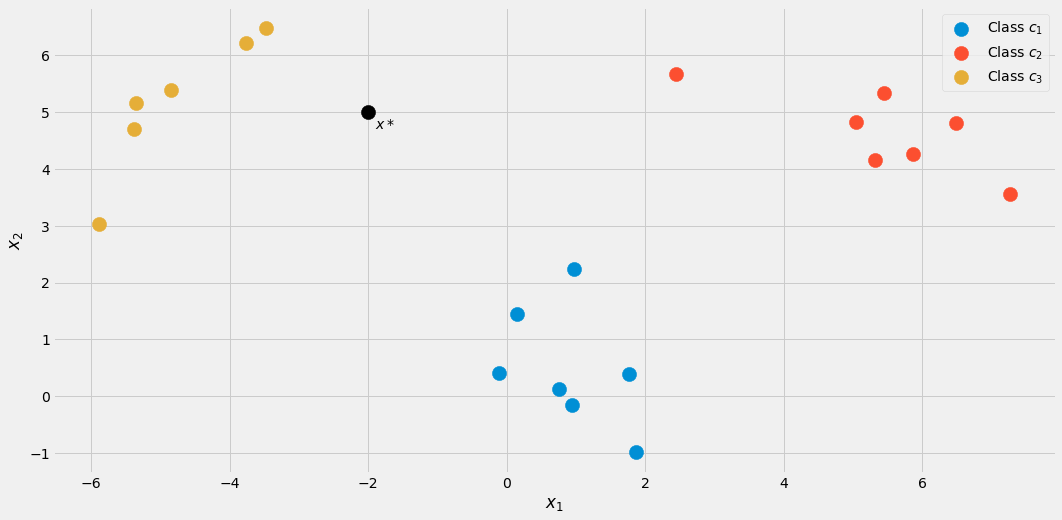

In [68]:
plt.figure(figsize=(16, 8))
for i in range(3):
    plt.scatter(X[np.where(y==i), 0], X[np.where(y==i), 1], s=200, label=f'Class $c_{i+1}$')
plt.scatter([-2], [5], c='k', s=200)
plt.annotate('$x*$', (-1.9, 4.7))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()

In [69]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class GaussianNaiveBayesClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.priors_ = np.bincount(y) / len(y)
        self.n_classes_ = np.max(y) + 1
        
        self.means_ = np.array([X[np.where(y==i)].mean(axis=0) for i in range(self.n_classes_)])
        self.stds_ = np.array([X[np.where(y==i)].std(axis=0) for i in range(self.n_classes_)])
        
        
        return self
    
    def predict_proba(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        res = []
        for i in range(len(X)):
            probas = []
            for j in range(self.n_classes_):
                probas.append((1/np.sqrt(2*np.pi*self.stds_[j]**2)*np.exp(-0.5*((X[i]-self.means_[j])/self.stds_[j])**2)).prod()*self.priors_[j])
            probas = np.array(probas)
            res.append(probas / probas.sum())
            
        
        return np.array(res)
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        res = self.predict_proba(X)
        
        return res.argmax(axis=1)

In [ ]:
my_gauss = GaussianNaiveBayesClassifier()
print(X)
print(y)
my_gauss.fit(X, y)
my_gauss.predict_proba([[-2, 5], [0,0], [6, -0.3]])

In [71]:
my_gauss.predict([[-2, 5], [0,0], [6, -0.3]])

array([2, 0, 1], dtype=int64)

In [72]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(var_smoothing=0)
gnb.fit(X, y)
gnb.predict_proba([[-2, 5], [0,0], [6, -0.3]])

array([[8.06313823e-07, 1.36201957e-04, 9.99862992e-01],
       [1.00000000e+00, 4.23258691e-14, 1.92051255e-11],
       [4.30879705e-01, 5.69120295e-01, 9.66618838e-27]])

In [73]:
gnb.predict([[-2, 5], [0,0], [6, -0.3]])

array([2, 0, 1])

In [56]:
from mlxtend.plotting import plot_decision_regions

Text(0.5, 1.0, 'Decision Regions')

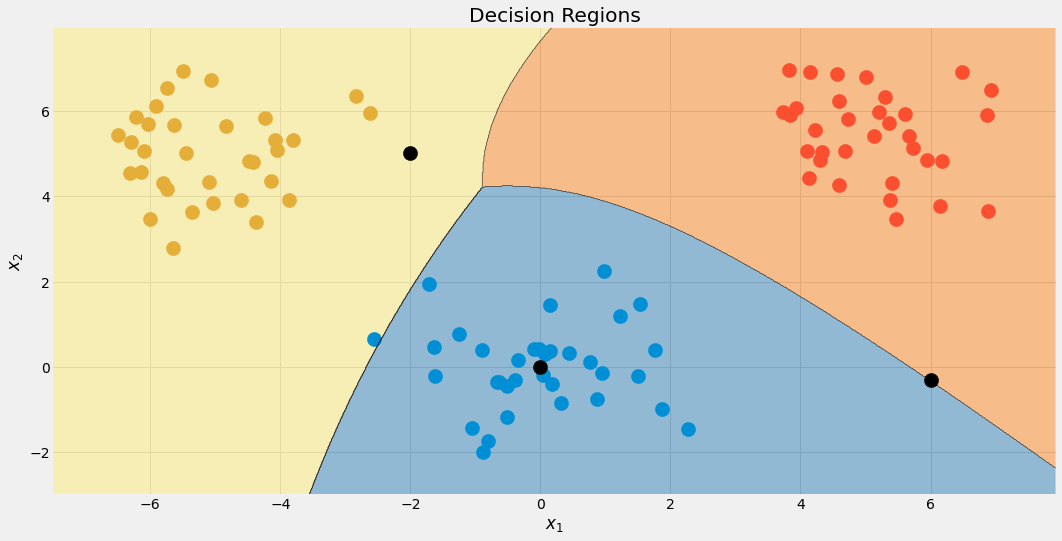

In [60]:
plt.figure(figsize=(16, 8))
plot_decision_regions(X, y, clf=gnb, legend=0, colors='#1f77b4,#ff7f0e,#ffec6e')
for i in range(3):
    plt.scatter(X[np.where(y==i), 0], X[np.where(y==i), 1], s=200)
plt.scatter([-2, 0, 6], [5, 0, -0.3], c='k', s=200)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Decision Regions')